# Analyzing Mental Health Challenges Among International Students

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df_1 = (lambda: _deepnote_execute_sql('-- Runing the code to view the data in students\nSELECT * \nFROM \'students.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('-- Runing the code to view the data in students\nSELECT * \nFROM \'students.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_1

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21,3,4,Long,5,High,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22,3,3,Medium,3,Average,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19,2,1,Short,5,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19,2,1,Short,5,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


In [3]:
df_2 = (lambda: _deepnote_execute_sql('-- Checking for missing data\nSELECT column_name\nFROM information_schema.columns\nWHERE table_name = \'students\';', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('-- Checking for missing data\nSELECT column_name\nFROM information_schema.columns\nWHERE table_name = \'students\';', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_2

,column_name


In [13]:
df_3 = (lambda: _deepnote_execute_sql('-- Counting students by Type\nSELECT inter_dom, COUNT(*) AS total_students\nFROM \'students.csv\'\nGROUP BY inter_dom;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('-- Counting students by Type\nSELECT inter_dom, COUNT(*) AS total_students\nFROM \'students.csv\'\nGROUP BY inter_dom;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_3

,inter_dom,total_students
0,Inter,201
1,Dom,67


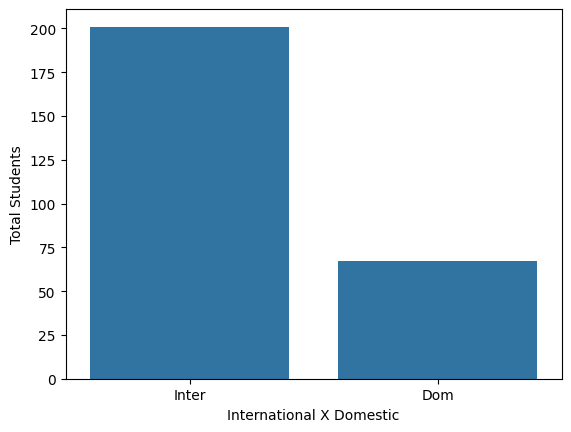

In [121]:
sns.barplot(data=df_3, x="inter_dom", y="total_students")
plt.xlabel("International X Domestic")
plt.ylabel("Total Students")
plt.show()

In [29]:
df_6 = (lambda: _deepnote_execute_sql('-- Length of Stay vs. Depression\nSELECT stay, ROUND(AVG(todep), 2) AS avg_phq\nFROM \'students.csv\'\nGROUP BY stay\nORDER BY stay', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('-- Length of Stay vs. Depression\nSELECT stay, ROUND(AVG(todep), 2) AS avg_phq\nFROM \'students.csv\'\nGROUP BY stay\nORDER BY stay', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_6

,stay,avg_phq
0,1,7.70
1,2,8.58
2,3,8.87
3,4,7.96
4,5,7.67
5,6,6.00
6,7,4.00
7,8,10.00
8,10,13.00


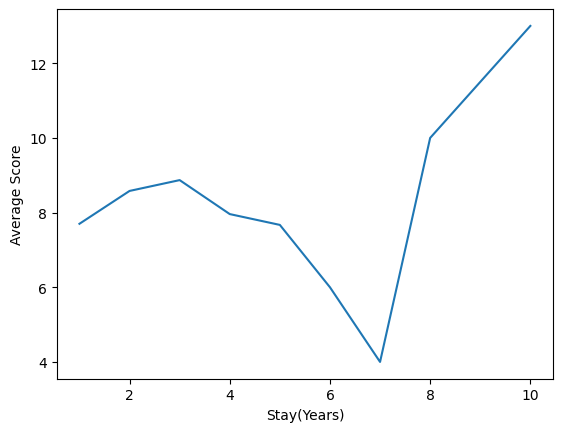

In [123]:
sns.lineplot(data=df_6, x="stay", y="avg_phq")

plt.xlabel("Stay(Years)")
plt.ylabel("Average Score")
plt.show()

In [31]:
df_8 = (lambda: _deepnote_execute_sql('-- Counting the International Students and checking the averages for each length of stay (in years)\nSELECT stay,\n    COUNT(inter_dom) AS count_int,\n    ROUND(AVG(todep), 2) AS average_phq,\n    ROUND(AVG(tosc), 2) AS average_scs,\n    ROUND(AVG(toas), 2) AS average_as\nFROM \'students.csv\'\nWHERE inter_dom = \'Inter\'\nGROUP BY stay\nORDER BY stay DESC;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('-- Counting the International Students and checking the averages for each length of stay (in years)\nSELECT stay,\n    COUNT(inter_dom) AS count_int,\n    ROUND(AVG(todep), 2) AS average_phq,\n    ROUND(AVG(tosc), 2) AS average_scs,\n    ROUND(AVG(toas), 2) AS average_as\nFROM \'students.csv\'\nWHERE inter_dom = \'Inter\'\nGROUP BY stay\nORDER BY stay DESC;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_8

,stay,count_int,average_phq,average_scs,average_as
0,10,1,13.00,32.00,50.00
1,8,1,10.00,44.00,65.00
2,7,1,4.00,48.00,45.00
3,6,3,6.00,38.00,58.67
4,5,1,0.00,34.00,91.00
5,4,14,8.57,33.93,87.71
6,3,46,9.09,37.13,78.00
7,2,39,8.28,37.08,77.67
8,1,95,7.48,38.11,72.80


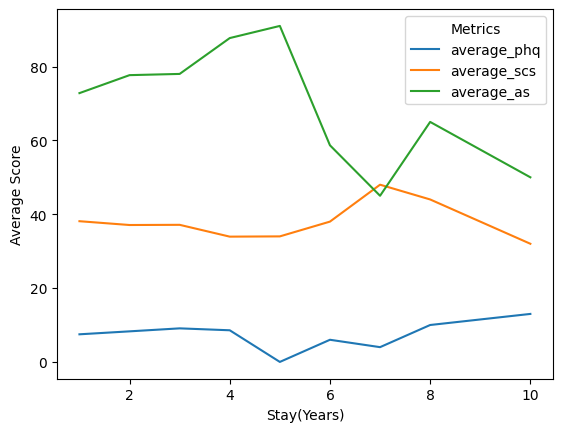

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fixing the code to iterate over the columns for y-axis and plot multiple lines
for column in ["average_phq", "average_scs", "average_as"]:
    sns.lineplot(data=df_8, x="stay", y=column, label=column)

plt.legend(title='Metrics')
plt.xlabel("Stay(Years)")
plt.ylabel("Average Score")
plt.show()

In [115]:
df_9 = (lambda: _deepnote_execute_sql('-- Depression Scores in International Students by Gender\nSELECT gender, ROUND(AVG(todep), 2) AS average_phq\nFROM \'students.csv\'\nWHERE inter_dom = \'Inter\'\nGROUP BY gender', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('-- Depression Scores in International Students by Gender\nSELECT gender, ROUND(AVG(todep), 2) AS average_phq\nFROM \'students.csv\'\nWHERE inter_dom = \'Inter\'\nGROUP BY gender', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_9

,gender,average_phq
0,Male,7.48
1,Female,8.37


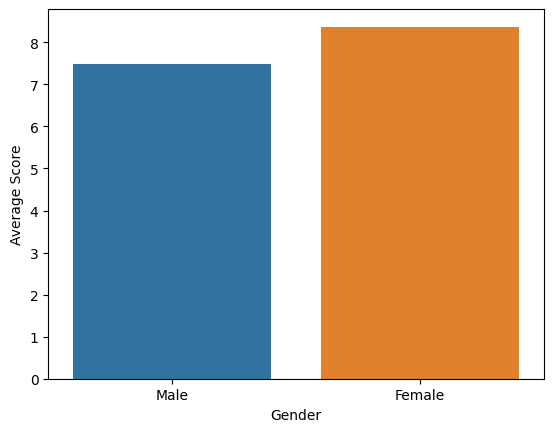

In [119]:
sns.barplot(data=df_9, x="gender", y="average_phq", hue="gender")

plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()

In [107]:
df_10 = (lambda: _deepnote_execute_sql('-- Depression Scores in International Students by Region of Origin:\nSELECT region, ROUND(AVG(todep), 2) AS average_phq\nFROM \'students.csv\'\nWHERE inter_dom = \'Inter\'\nGROUP BY region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('-- Depression Scores in International Students by Region of Origin:\nSELECT region, ROUND(AVG(todep), 2) AS average_phq\nFROM \'students.csv\'\nWHERE inter_dom = \'Inter\'\nGROUP BY region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_10

,region,average_phq
0,SEA,8.20
1,EA,8.25
2,SA,7.06
3,Others,7.09
4,JAP,7.50


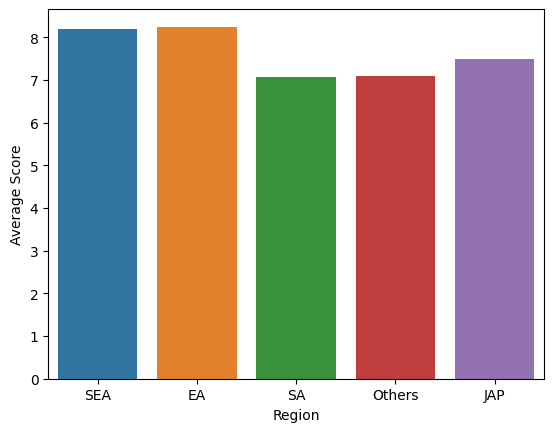

In [113]:
sns.barplot(data=df_10, x="region", y="average_phq", hue="region")

plt.xlabel("Region")
plt.ylabel("Average Score")
plt.show()

In [109]:
(lambda: DeepnoteChart(df_10, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"region","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"average_phq","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"average_phq","scale":{"scheme":"deepnote_blues"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(df_10, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"region","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"average_phq","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"average_phq","scale":{"scheme":"deepnote_blues"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7209bfa9-65d7-42ad-9e03-7f856072613f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>